<a href="https://colab.research.google.com/github/arlenkim/study/blob/main/65C3_US_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [3]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/Lib

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 0 B/9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124015 fil

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [6]:
# DATA 다운
df = pd.read_csv("https://raw.githubusercontent.com/arlenkim/study/main/65C3_GI_CFM_TOTAL_all.csv",encoding='euc-kr',header=1)

In [7]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 60

In [8]:
# view dimensions of dataset

df.head(5)

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,작업일시,탱크온도,호스온도,노즐온도,작업일시.1,작업일시.2,작업횟수,1:시간,1:진폭,1:주파수,1:에너지,1:최대출력,1:사용여부,1:평균출력 관리범위,1:평균출력1,1:평균출력2,1:평균출력3,2:시간,2:진폭,2:주파수,2:에너지,2:최대출력,2:사용여부,2:평균출력 관리범위,2:평균출력1,2:평균출력2,2:평균출력3,3:시간,3:진폭,3:주파수,3:에너지,3:최대출력,3:사용여부,3:평균출력 관리범위,3:평균출력1,3:평균출력2,3:평균출력3,4:시간,4:진폭,4:주파수,4:에너지,4:최대출력,4:사용여부,4:평균출력 관리범위,4:평균출력1,4:평균출력2,4:평균출력3,5:시간,5:진폭,5:주파수,5:에너지,5:최대출력,5:사용여부,5:평균출력 관리범위,5:평균출력1,5:평균출력2,5:평균출력3,6:시간,6:진폭,6:주파수,6:에너지,6:최대출력,6:사용여부,6:평균출력 관리범위,6:평균출력1,6:평균출력2,6:평균출력3,7:시간,7:진폭,7:주파수,7:에너지,7:최대출력,7:사용여부,7:평균출력 관리범위,7:평균출력1,7:평균출력2,7:평균출력3,8:시간,8:진폭,8:주파수,8:에너지,8:최대출력,8:사용여부,8:평균출력 관리범위,8:평균출력1,8:평균출력2,8:평균출력3,9:시간,9:진폭,9:주파수,9:에너지,9:최대출력,9:사용여부,9:평균출력 관리범위,9:평균출력1,9:평균출력2,9:평균출력3,10:시간,10:진폭,10:주파수,10:에너지,10:최대출력,10:사용여부,10:평균출력 관리범위,10:평균출력1,10:평균출력2,10:평균출력3,11:시간,11:진폭,11:주파수,11:에너지,11:최대출력,11:사용여부,11:평균출력 관리범위,11:평균출력1,11:평균출력2,11:평균출력3,12:시간,12:진폭,12:주파수,12:에너지,12:최대출력,12:사용여부,12:평균출력 관리범위,12:평균출력1,12:평균출력2,12:평균출력3,13:시간,13:진폭,13:주파수,13:에너지,13:최대출력,13:사용여부,13:평균출력 관리범위,13:평균출력1,13:평균출력2,13:평균출력3,14:시간,14:진폭,14:주파수,14:에너지,14:최대출력,14:사용여부,14:평균출력 관리범위,14:평균출력1,14:평균출력2,14:평균출력3,15:시간,15:진폭,15:주파수,15:에너지,15:최대출력,15:사용여부,15:평균출력 관리범위,15:평균출력1,15:평균출력2,15:평균출력3,16:시간,16:진폭,16:주파수,16:에너지,16:최대출력,16:사용여부,16:평균출력 관리범위,16:평균출력1,16:평균출력2,16:평균출력3,17:시간,17:진폭,17:주파수,17:에너지,17:최대출력,17:사용여부,17:평균출력 관리범위,17:평균출력1,17:평균출력2,17:평균출력3,18:시간,18:진폭,18:주파수,18:에너지,18:최대출력,18:사용여부,18:평균출력 관리범위,18:평균출력1,18:평균출력2,18:평균출력3,19:시간,19:진폭,19:주파수,19:에너지,19:최대출력,19:사용여부,19:평균출력 관리범위,19:평균출력1,19:평균출력2,19:평균출력3,20:시간,20:진폭,20:주파수,20:에너지,20:최대출력,20:사용여부,20:평균출력 관리범위,20:평균출력1,20:평균출력2,20:평균출력3,작업일시.3,작업횟수.1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:사용여부.1,1:평균출력 관리범위.1,1:평균출력1.1,1:평균출력2.1,1:평균출력3.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:사용여부.1,2:평균출력 관리범위.1,2:평균출력1.1,2:평균출력2.1,2:평균출력3.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:사용여부.1,3:평균출력 관리범위.1,3:평균출력1.1,3:평균출력2.1,3:평균출력3.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:사용여부.1,4:평균출력 관리범위.1,4:평균출력1.1,4:평균출력2.1,4:평균출력3.1,5:시간.1,5:진폭.1,5:주파수.1,5:에너지.1,5:최대출력.1,5:사용여부.1,5:평균출력 관리범위.1,5:평균출력1.1,5:평균출력2.1,5:평균출력3.1,6:시간.1,6:진폭.1,6:주파수.1,6:에너지.1,6:최대출력.1,6:사용여부.1,6:평균출력 관리범위.1,6:평균출력1.1,6:평균출력2.1,6:평균출력3.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:사용여부.1,7:평균출력 관리범위.1,7:평균출력1.1,7:평균출력2.1,7:평균출력3.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:사용여부.1,8:평균출력 관리범위.1,8:평균출력1.1,8:평균출력2.1,8:평균출력3.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:사용여부.1,9:평균출력 관리범위.1,9:평균출력1.1,9:평균출력2.1,9:평균출력3.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:사용여부.1,10:평균출력 관리범위.1,10:평균출력1.1,10:평균출력2.1,10:평균출력3.1,11:시간.1,11:진폭.1,11:주파수.1,11:에너지.1,11:최대출력.1,11:사용여부.1,11:평균출력 관리범위.1,11:평균출력1.1,11:평균출력2.1,11:평균출력3.1,12:시간.1,12:진폭.1,12:주파수.1,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력 관리범위.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,2,2022-10-04,2,2022-10-04 8:18,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2O42002,휨검사,NaN,2022-10-04 8:19,0,0,0,2022-10-04 8:27,2022-10-04 8:27,1.0,2.0,74,15.07,4508,2520,▣,1100 ~ 3100,2247,NaN,NaN,2.0,72,15.01,3088,1641,▣,1100 ~ 3100,1544,NaN,NaN,2.0,65,15.06,3092,1627,▣,1100 ~ 3100,1578,NaN,NaN,2.0,64,15.04,3022,1581,▣,1100 ~ 3100,1540,NaN,NaN,2.0,68,15.04,3001,1605,▣,1100 ~ 3100,1469,NaN,NaN,2.0,77,15.02,4037,2261,▣,1100 ~ 3100,1968,NaN,NaN,2.0,79,15.04,4361,2585,▣,1100 ~ 3100,2235,NaN,NaN,2.5,82,15.00,0,0,NaN,1100 ~ 3100,0,NaN,NaN,2.8,81,15.01,0,0,NaN,1100 ~ 3100,0,NaN,NaN,2.2,80,14.92,0,0,NaN,40 ~ 250,0,NaN,NaN,2.0,67,14.99,4040,2187,▣,1300 ~ 3100,2110,NaN,NaN,2.0,55,14.97,3742,2044,▣,1300 ~ 3100,2005,NaN,NaN,2.0,60,14.92,3614,1975,▣,1300 ~ 3100,1855,NaN,NaN,2.0,58,15.01,3963,2046,▣,1300 ~ 3100,2009,NaN,NaN,2.0,63,14.98,3724,1931,▣,1300 ~ 3100,1877,NaN,NaN,2.0,60,14.99,4488,2259,▣,1300 ~ 3100,2231,NaN,NaN,2.1,80,14.93,4555,2381,▣,1300 ~ 3100,2263,NaN,NaN,2.0,82,14.86,0,0,NaN,1600 ~ 3100,0,NaN,NaN,2.0,80,14.91,0,0,NaN,1600 ~ 3100,0,NaN,NaN,2.0,70,15.01,0,0,NaN,40 ~ 250,0,NaN,NaN,2022-10-04 8:28,1.0,2.1,81,15.03,4925,2503,▣,1300 ~ 3100,2351

In [9]:
df.shape

(42864, 349)

In [10]:
df.columns[0:39]

Index(['라인', '작업일자', '순번', '생성일시', '모델번호', '모델코드', '모델이름', '바코드', '최종공정', '선택',
       '작업일시', '탱크온도', '호스온도', '노즐온도', '작업일시.1', '작업일시.2', '작업횟수', '1:시간',
       '1:진폭', '1:주파수', '1:에너지', '1:최대출력', '1:사용여부', '1:평균출력 관리범위', '1:평균출력1',
       '1:평균출력2', '1:평균출력3', '2:시간', '2:진폭', '2:주파수', '2:에너지', '2:최대출력',
       '2:사용여부', '2:평균출력 관리범위', '2:평균출력1', '2:평균출력2', '2:평균출력3', '3:시간',
       '3:진폭'],
      dtype='object')

In [11]:
df2 = df.drop(['작업일자', '순번','모델번호', '모델코드', '모델이름','최종공정','선택','탱크온도', '호스온도', '노즐온도','작업일시','작업일시.1', '작업일시.2','작업횟수','작업일시.3', '작업횟수.1','작업일시.4',
               '1:시간', '1:진폭', '1:주파수', '1:사용여부', '1:평균출력 관리범위', '1:평균출력2', '1:평균출력3',
               '2:시간', '2:진폭', '2:주파수', '2:사용여부', '2:평균출력 관리범위', '2:평균출력2', '2:평균출력3',
               '3:시간', '3:진폭', '3:주파수', '3:사용여부', '3:평균출력 관리범위', '3:평균출력2', '3:평균출력3',
               '4:시간', '4:진폭', '4:주파수', '4:사용여부', '4:평균출력 관리범위', '4:평균출력2', '4:평균출력3',
               '5:시간', '5:진폭', '5:주파수', '5:사용여부', '5:평균출력 관리범위', '5:평균출력2', '5:평균출력3',
               '6:시간', '6:진폭', '6:주파수', '6:사용여부', '6:평균출력 관리범위', '6:평균출력2', '6:평균출력3',
               '7:시간', '7:진폭', '7:주파수', '7:사용여부', '7:평균출력 관리범위', '7:평균출력2', '7:평균출력3',
               '8:시간', '8:진폭', '8:주파수', '8:사용여부', '8:평균출력 관리범위', '8:평균출력2', '8:평균출력3',
               '9:시간', '9:진폭', '9:주파수', '9:사용여부', '9:평균출력 관리범위', '9:평균출력2', '9:평균출력3',
               '10:시간', '10:진폭', '10:주파수', '10:사용여부', '10:평균출력 관리범위', '10:평균출력2', '10:평균출력3',
               '11:시간',  '11:주파수', '11:사용여부', '11:평균출력 관리범위', '11:평균출력2', '11:평균출력3',
               '12:시간',  '12:주파수', '12:사용여부', '12:평균출력 관리범위', '12:평균출력2', '12:평균출력3',
               '13:시간',  '13:주파수', '13:사용여부', '13:평균출력 관리범위', '13:평균출력2', '13:평균출력3',
               '14:시간',  '14:주파수', '14:사용여부', '14:평균출력 관리범위', '14:평균출력2', '14:평균출력3',
               '15:시간',  '15:주파수', '15:사용여부', '15:평균출력 관리범위', '15:평균출력2', '15:평균출력3',
               '16:시간',  '16:주파수', '16:사용여부', '16:평균출력 관리범위', '16:평균출력2', '16:평균출력3',
               '17:시간',  '17:주파수', '17:사용여부', '17:평균출력 관리범위', '17:평균출력2', '17:평균출력3',
               '18:시간', '18:진폭', '18:주파수', '18:사용여부', '18:평균출력 관리범위', '18:평균출력2', '18:평균출력3',
               '19:시간', '19:진폭', '19:주파수', '19:사용여부', '19:평균출력 관리범위', '19:평균출력2', '19:평균출력3',
               '20:시간', '20:진폭', '20:주파수', '20:사용여부', '20:평균출력 관리범위', '20:평균출력2', '20:평균출력3',
               '8:에너지', '8:최대출력', '8:평균출력1',
               '9:에너지', '9:최대출력', '9:평균출력1',
               '10:에너지', '10:최대출력', '10:평균출력1',
               '18:에너지', '18:최대출력', '18:평균출력1',
               '19:에너지', '19:최대출력', '19:평균출력1',
               '20:에너지', '20:최대출력', '20:평균출력1',
               '1:시간.1',  '1:주파수.1', '1:사용여부.1', '1:평균출력 관리범위.1', '1:평균출력2.1', '1:평균출력3.1',
               '2:시간.1',  '2:주파수.1', '2:사용여부.1', '2:평균출력 관리범위.1', '2:평균출력2.1', '2:평균출력3.1',
               '3:시간.1',  '3:주파수.1', '3:사용여부.1', '3:평균출력 관리범위.1', '3:평균출력2.1', '3:평균출력3.1',
               '4:시간.1',  '4:주파수.1', '4:사용여부.1', '4:평균출력 관리범위.1', '4:평균출력2.1', '4:평균출력3.1',
               '5:시간.1', '5:진폭.1', '5:주파수.1', '5:사용여부.1', '5:평균출력 관리범위.1', '5:평균출력2.1', '5:평균출력3.1',
               '6:시간.1', '6:진폭.1', '6:주파수.1', '6:사용여부.1', '6:평균출력 관리범위.1', '6:평균출력2.1', '6:평균출력3.1',
               '7:시간.1', '7:주파수.1', '7:사용여부.1', '7:평균출력 관리범위.1', '7:평균출력2.1', '7:평균출력3.1',
               '8:시간.1', '8:주파수.1', '8:사용여부.1', '8:평균출력 관리범위.1', '8:평균출력2.1', '8:평균출력3.1',
               '9:시간.1', '9:주파수.1', '9:사용여부.1', '9:평균출력 관리범위.1', '9:평균출력2.1', '9:평균출력3.1',
               '10:시간.1','10:주파수.1', '10:사용여부.1', '10:평균출력 관리범위.1', '10:평균출력2.1', '10:평균출력3.1',
               '11:시간.1', '11:진폭.1', '11:주파수.1', '11:사용여부.1', '11:평균출력 관리범위.1', '11:평균출력2.1', '11:평균출력3.1',
               '12:시간.1', '12:진폭.1', '12:주파수.1', '12:사용여부.1', '12:평균출력 관리범위.1', '12:평균출력2.1', '12:평균출력3.1',
               '5:에너지.1', '5:최대출력.1','5:평균출력1.1', '6:에너지.1', '6:최대출력.1', '6:평균출력1.1',
               '11:에너지.1', '11:최대출력.1','11:평균출력1.1', '12:에너지.1', '12:최대출력.1', '12:평균출력1.1',
               ], axis=1)

In [12]:
df2.columns[0:50]

Index(['라인', '생성일시', '바코드', '1:에너지', '1:최대출력', '1:평균출력1', '2:에너지', '2:최대출력',
       '2:평균출력1', '3:에너지', '3:최대출력', '3:평균출력1', '4:에너지', '4:최대출력', '4:평균출력1',
       '5:에너지', '5:최대출력', '5:평균출력1', '6:에너지', '6:최대출력', '6:평균출력1', '7:에너지',
       '7:최대출력', '7:평균출력1', '11:진폭', '11:에너지', '11:최대출력', '11:평균출력1', '12:진폭',
       '12:에너지', '12:최대출력', '12:평균출력1', '13:진폭', '13:에너지', '13:최대출력',
       '13:평균출력1', '14:진폭', '14:에너지', '14:최대출력', '14:평균출력1', '15:진폭', '15:에너지',
       '15:최대출력', '15:평균출력1', '16:진폭', '16:에너지', '16:최대출력', '16:평균출력1',
       '17:진폭', '17:에너지'],
      dtype='object')

In [13]:
df2.head()

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,11:진폭,11:에너지,11:최대출력,11:평균출력1,12:진폭,12:에너지,12:최대출력,12:평균출력1,13:진폭,13:에너지,13:최대출력,13:평균출력1,14:진폭,14:에너지,14:최대출력,14:평균출력1,15:진폭,15:에너지,15:최대출력,15:평균출력1,16:진폭,16:에너지,16:최대출력,16:평균출력1,17:진폭,17:에너지,17:최대출력,17:평균출력1,1:진폭.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:진폭.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:진폭.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:진폭.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,7:진폭.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:진폭.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:진폭.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:진폭.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,2,2022-10-04 8:18,SACQ30454509KTS2O42002,4508,2520,2247,3088,1641,1544,3092,1627,1578,3022,1581,1540,3001,1605,1469,4037,2261,1968,4361,2585,2235,67,4040,2187,2110,55,3742,2044,2005,60,3614,1975,1855,58,3963,2046,2009,63,3724,1931,1877,60,4488,2259,2231,80,4555,2381,2263,81,4925,2503,2351,78,4931,2658,2579,66,4344,2323,2222,74,4263,2261,2207,73,5805,2999,2739,72,4353,2303,2262,64,4140,2322,2185,66,4271,2252,2202,合,-0.3,合,-1.1,合,-0.3,合,-0.7,合
1,2,2022-10-04 8:22,SACQ30454509KTS2O42004,5105,2989,2539,3643,2120,1889,3454,1917,1794,3180,1693,1627,3277,1826,1624,4377,2458,2254,4821,2726,2408,67,4039,2145,2074,55,3682,2040,1953,60,3744,2098,1880,58,3869,2072,2005,63,3760,2033,1924,60,4390,2289,2206,80,4705,2446,2366,81,4835,2484,2325,78,5189,2741,2679,66,4332,2330,2250,74,4411,2426,2353,73,5770,2999,2483,72,4434,2431,2317,64,3862,2230,1998,66,4360,2290,2219,合,-0.3,合,-1.1,合,-0.4,合,-0.7,合
2,2,2022-10-04 8:25,SACQ30454509KTS2O42006,5038,2965,2571,3537,2059,1808,3623,1892,1821,3201,1745,1681,3296,1996,1678,4240,2334,2180,4727,2891,2367,67,3938,2078,2012,55,3865,2118,2084,60,3630,1993,1853,58,3972,2158,2101,63,3758,2037,1983,60,4409,2427,2308,80,4750,2434,2404,81,4870,2542,2386,78,5045,2740,2615,66,4206,2291,2209,74,4491,2363,2294,73,5780,2999,2452,72,4360,2345,2262,64,4120,2274,2249,66,4198,2274,2162,合,-0.4,合,-1.4,合,-0.5,合,-0.7,合
3,2,2022-10-04 8:25,SACQ30454509KTS2O42008,4874,2770,2373,3494,1911,1783,3621,2080,1889,3248,1771,1720,3326,1974,1614,4334,2306,2168,5030,2774,2565,67,4080,2152,2042,55,3611,2029,1941,60,3681,2054,1842,58,3959,2048,2010,63,3780,2038,1979,60,4426,2293,2258,80,4523,2372,2241,81,4968,2605,2419,78,5303,2940,2812,66,4428,2366,2335,74,4390,2337,2284,73,5776,2999,2523,72,4397,2399,2289,64,4055,2373,2097,66,4190,2323,2165,合,-0.5,合,-1.4,合,-0.4,合,-0.6,合
4,2,2022-10-04 8:27,SACQ30454509KTS2O4200A,4792,2794,2414,3378,1830,1715,3678,1989,1899,3217,1763,1704,3290,1971,1638,4644,2581,2355,4925,2670,2452,67,4057,2232,2131,55,3630,2120,1994,60,3586,1947,1833,58,3921,2107,2073,63,3754,1955,1931,60,4494,2514,2290,80,4570,2302,2184,81,4888,2749,2441,78,4975,2740,2584,66,4468,2364,2303,74,4206,2283,2148,73,5775,2999,2530,72,4442,2382,2320,64,3782,2315,1976,66,4044,2217,2034,合,-1.7,合,-2.1,合,-0.4,合,-0.6,合


In [14]:
df2.dtypes

라인          int64
생성일시       object
바코드        object
1:에너지       int64
1:최대출력      int64
           ...   
판정.1       object
좌측        float64
판정.2       object
우측        float64
판정.3       object
Length: 93, dtype: object

In [15]:
df2.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,11:진폭,11:에너지,11:최대출력,11:평균출력1,12:진폭,12:에너지,12:최대출력,12:평균출력1,13:진폭,13:에너지,13:최대출력,13:평균출력1,14:진폭,14:에너지,14:최대출력,14:평균출력1,15:진폭,15:에너지,15:최대출력,15:평균출력1,16:진폭,16:에너지,16:최대출력,16:평균출력1,17:진폭,17:에너지,17:최대출력,17:평균출력1,1:진폭.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:진폭.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:진폭.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:진폭.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,7:진폭.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:진폭.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:진폭.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:진폭.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,상측,하측,좌측,우측
count,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000
mean,2.506136,4205.926395,2370.045306,2118.365901,3173.878243,1842.987892,1664.060680,3180.354237,1875.446389,1672.427422,3140.534948,1834.323908,1689.872550,3308.178238,1978.058044,1732.666457,3504.440976,2078.800462,1834.247504,4352.785928,2510.928331,2208.934117,66.512528,4197.325448,2385.895133,2273.860629,63.167996,4324.448792,2506.069732,2343.832587,63.857526,4441.951101,2434.620521,2337.959943,65.707004,4562.604003,2517.597331,2402.887971,67.413820,4373.402062,2420.900523,2321.020157,62.298456,4603.292437,2580.104377,2420.581514,70.806224,4555.650056,2546.401269,2403.750467,69.273283,4521.688480,2548.537654,2413.530025,69.455510,4465.903159,2560.141144,2447.134542,67.923712,4272.071435,2509.209360,2356.135942,68.369074,4297.358133,2526.561334,2392.609369,72.762271,5021.759985,2809.533828,2503.300579,68.706070,4502.400523,2598.963536,2492.590262,67.002823,4378.755482,2531.908828,2407.833987,64.725364,4179.009402,2373.418860,2293.668230,-0.591942,-1.086033,-0.371678,-0.152853
std,0.499968,682.285663,317.728099,304.348060,468.892704,222.830064,203.725179,494.252891,232.860482,214.241406,478.663783,265.722147,228.140246,478.283032,262.756568,232.272261,522.518821,271.433067,240.832058,580.570166,305.801192,258.002362,7.656422,507.423013,346.363246,320.726763,6.049858,527.391818,300.610705,264.404812,5.928717,568.284113,294.833798,293.128935,6.355964,627.670055,349.494884,323.080389,7.003327,588.198653,323.483839,311.688175,6.168464,620.438221,300.032730,274.229254,10.601146,653.324540,331.406114,308.890124,11.910958,695.969479,284.811669,270.398199,7.797924,623.770589,252.559733,226.300187,6.039099,702.487078,289.351438,281.876469,7.412996,638.100523,299.706582,295.180652,6.252836,912.922018,278.559165,223.058032,8.127239,519.494044,328.196605,323.488231,5.569703,576.678621,274.460452,284.768365,6.789586,529.153115,225.467132,218.755267,0.500578,0.578133,0.396115,0.379935
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [16]:
df2.isnull().sum()

라인        0
생성일시      0
바코드       0
1:에너지     0
1:최대출력    0
         ..
판정.1      0
좌측        0
판정.2      0
우측        0
판정.3      0
Length: 93, dtype: int64

In [17]:
df2.shape

(42864, 93)

In [18]:
df2 = df2.replace(0, np.NaN)

In [19]:
df3 =df2.dropna(axis=0) 
df3.shape

(32609, 93)

In [20]:
df3.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,11:진폭,11:에너지,11:최대출력,11:평균출력1,12:진폭,12:에너지,12:최대출력,12:평균출력1,13:진폭,13:에너지,13:최대출력,13:평균출력1,14:진폭,14:에너지,14:최대출력,14:평균출력1,15:진폭,15:에너지,15:최대출력,15:평균출력1,16:진폭,16:에너지,16:최대출력,16:평균출력1,17:진폭,17:에너지,17:최대출력,17:평균출력1,1:진폭.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:진폭.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:진폭.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:진폭.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,7:진폭.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:진폭.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:진폭.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:진폭.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,상측,하측,좌측,우측
count,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000
mean,2.437732,4319.915330,2412.880125,2164.968720,3253.249900,1880.346530,1701.113680,3253.325892,1902.095526,1703.114999,3203.017603,1860.054310,1717.233954,3371.306694,2001.925266,1758.313717,3557.633015,2092.917722,1852.931583,4429.603208,2535.368211,2232.395934,67.707688,4225.110951,2390.518691,2278.769266,63.392376,4355.003496,2521.861572,2364.233892,64.755405,4478.481708,2455.280505,2356.408906,66.508173,4569.741881,2521.339753,2405.755466,68.400810,4410.427827,2437.725935,2334.978871,62.926370,4624.085437,2589.996872,2429.403754,72.401975,4628.830507,2570.382962,2422.789629,71.201907,4632.234015,2586.751142,2447.712779,70.663406,4569.697599,2591.896777,2473.248520,68.541630,4391.102824,2533.237419,2389.270385,69.333313,4361.225459,2531.267534,2399.834340,73.168328,5164.413107,2848.729308,2521.966052,69.988439,4532.934957,2588.539912,2479.622804,67.559201,4460.045478,2553.917262,2426.649085,65.770217,4254.672299,2393.685424,2312.002913,-0.651069,-1.189156,-0.446325,-0.217412
std,0.496115,572.645257,235.969625,235.082395,396.156389,165.297541,149.475825,425.283215,179.703787,166.631207,410.827897,219.240462,182.763498,397.293337,208.365327,183.824372,435.552193,212.281569,188.415644,465.033012,229.450310,186.859606,5.664308,399.119075,296.690735,270.919366,3.545765,412.414314,230.774031,194.462023,3.399741,457.948336,232.867978,235.685599,3.972713,515.007144,289.207630,261.774408,4.763601,488.034781,263.706287,252.333412,3.944577,520.450449,224.914065,200.974934,9.008857,569.600923,252.469328,231.914243,10.476442,609.217464,207.354379,195.396931,5.829757,541.749946,177.391489,141.241438,3.694203,661.260540,234.106670,230.376437,5.694763,594.714751,244.630169,244.341348,3.329706,828.751632,181.431318,120.528959,6.558936,400.541339,247.321065,243.003879,2.659924,510.845622,209.896177,232.019373,4.907939,453.447193,145.030287,141.748112,0.506727,0.546519,0.411355,0.407503
min,2.000000,2424.000000,1466.000000,1301.000000,2040.000000,1266.000000,1165.000000,2004.000000,1139.000000,1023.000000,1745.000000,1095.000000,927.000000,2034.000000,1282.000000,1071.000000,2196.000000,1228.000000,1092.000000,2853.000000,1652.000000,1548.000000,56.000000,2563.000000,1547.000000,1486.000000,55.000000,

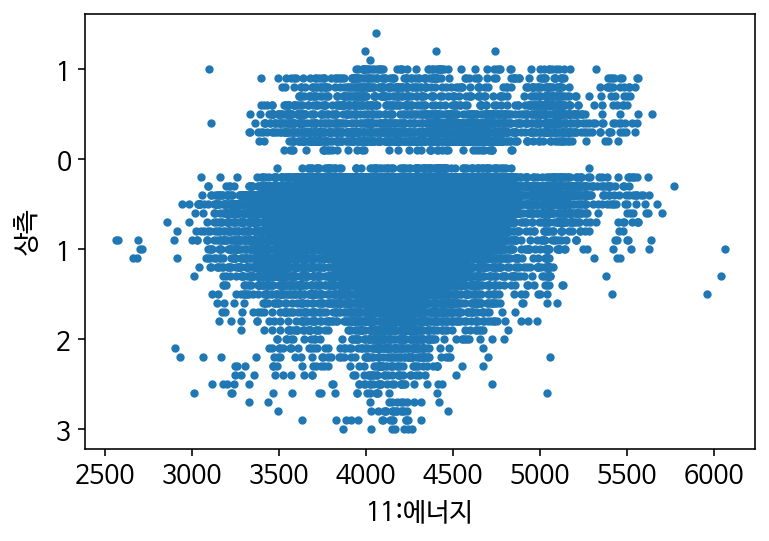

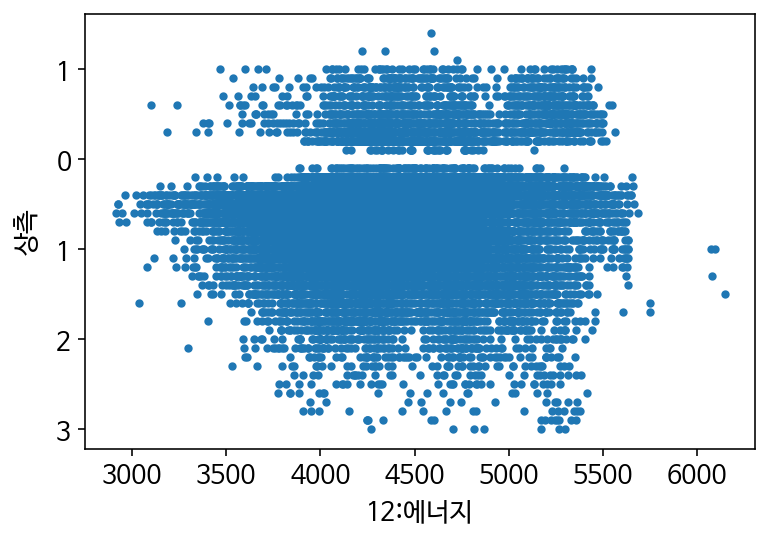

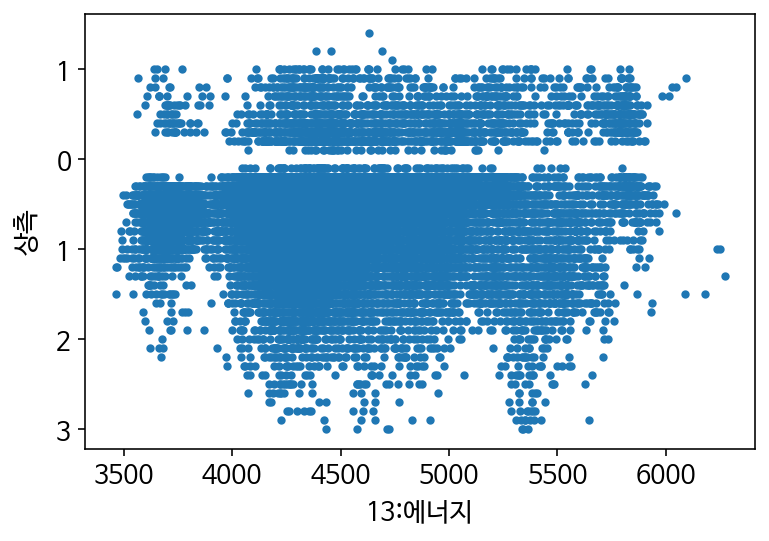

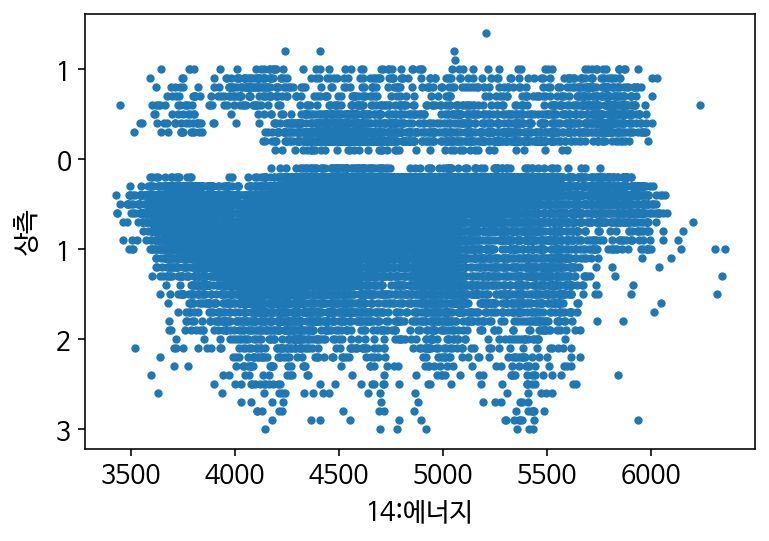

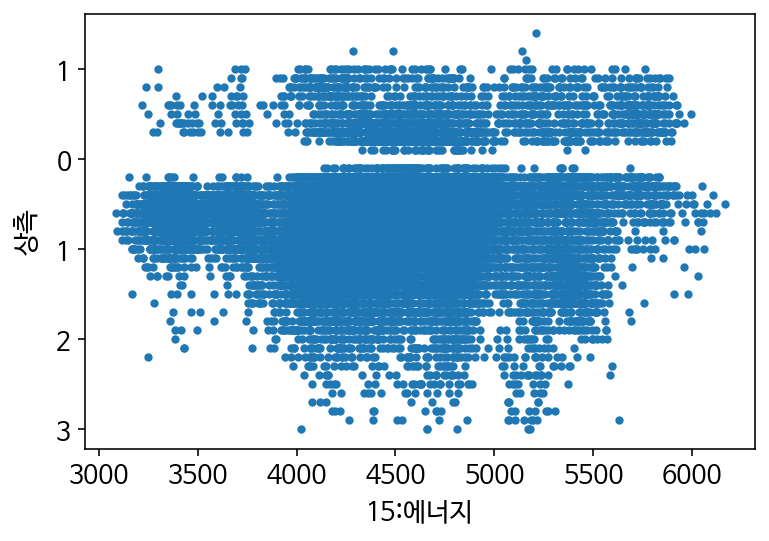

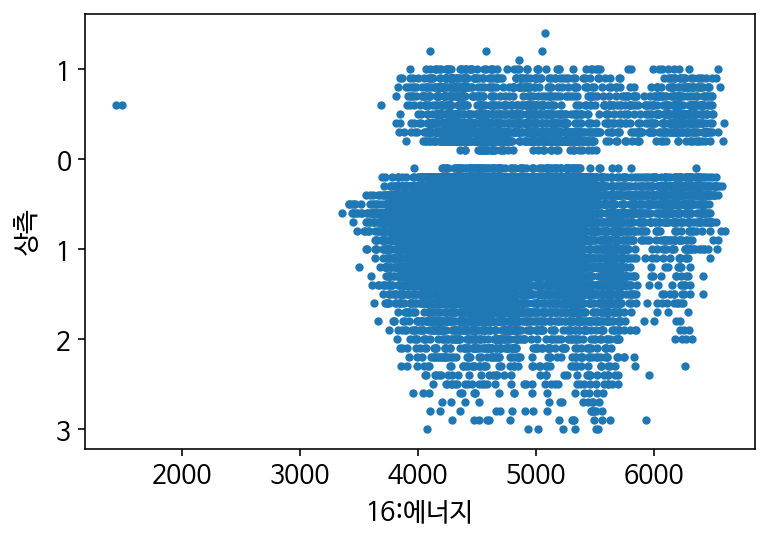

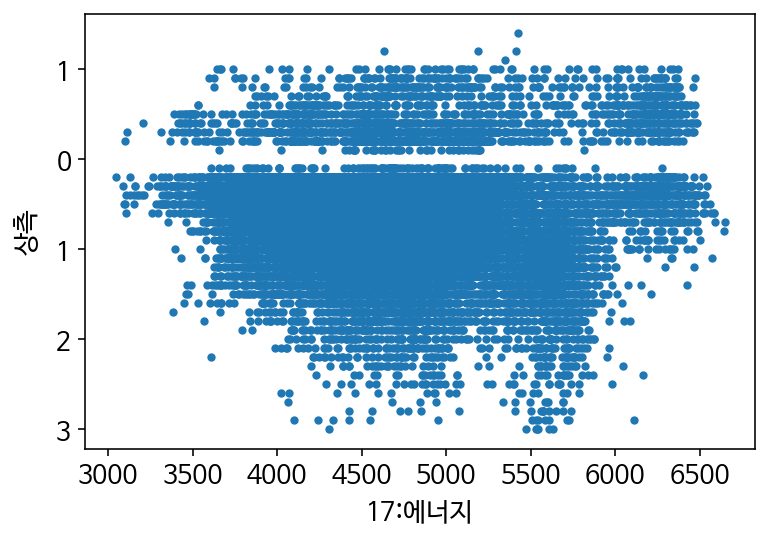

In [301]:
for col in ["11:에너지", "12:에너지","13:에너지","14:에너지","15:에너지", "16:에너지","17:에너지"]:
    plt.scatter(df3[col] , df3['상측'], s=10)
    plt.ylabel('상측')
    plt.xlabel(col)
    plt.show()

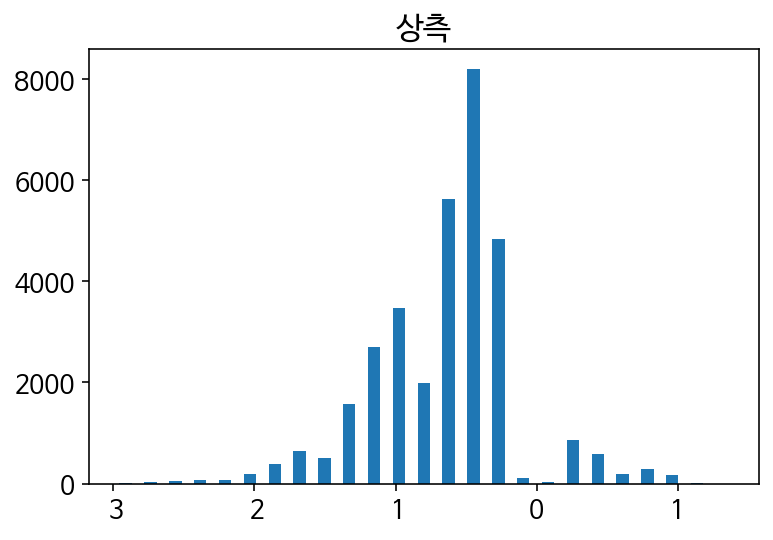

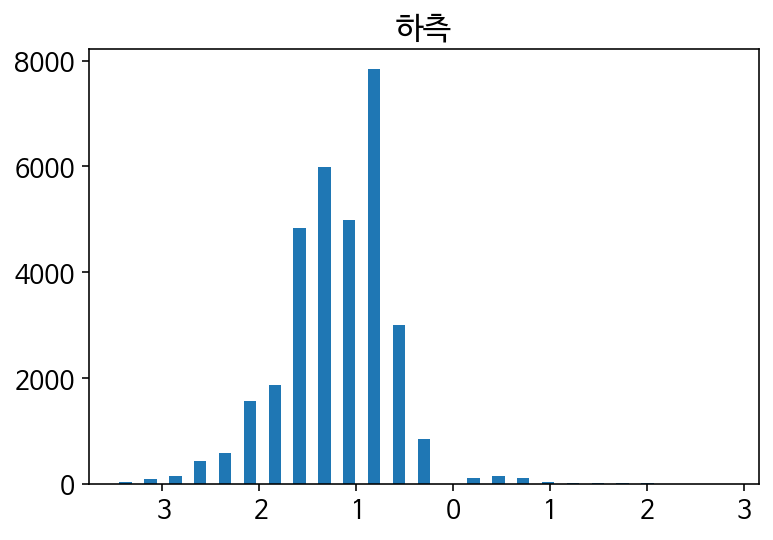

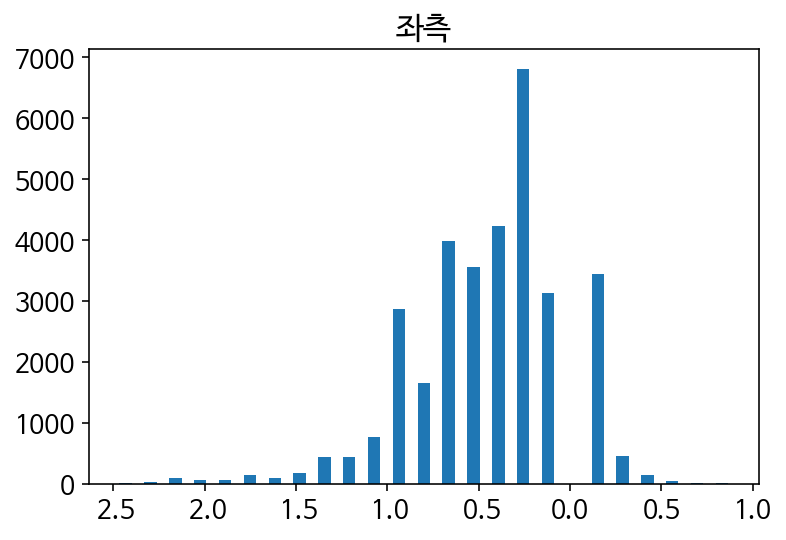

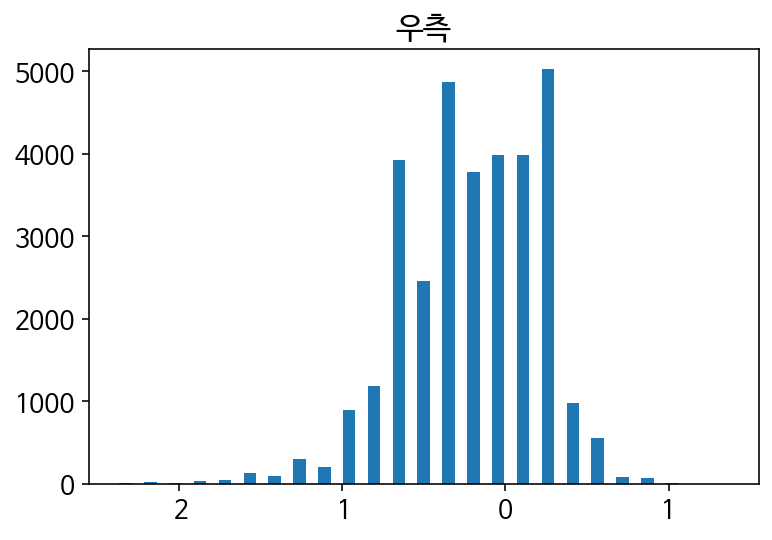

In [294]:
for col in ["상측","하측","좌측","우측"]:
    plt.hist(df3[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

In [323]:
df3.columns[0:50]

Index(['라인', '생성일시', '바코드', '1:에너지', '1:최대출력', '1:평균출력1', '2:에너지', '2:최대출력',
       '2:평균출력1', '3:에너지', '3:최대출력', '3:평균출력1', '4:에너지', '4:최대출력', '4:평균출력1',
       '5:에너지', '5:최대출력', '5:평균출력1', '6:에너지', '6:최대출력', '6:평균출력1', '7:에너지',
       '7:최대출력', '7:평균출력1', '11:진폭', '11:에너지', '11:최대출력', '11:평균출력1', '12:진폭',
       '12:에너지', '12:최대출력', '12:평균출력1', '13:진폭', '13:에너지', '13:최대출력',
       '13:평균출력1', '14:진폭', '14:에너지', '14:최대출력', '14:평균출력1', '15:진폭', '15:에너지',
       '15:최대출력', '15:평균출력1', '16:진폭', '16:에너지', '16:최대출력', '16:평균출력1',
       '17:진폭', '17:에너지'],
      dtype='object')

In [21]:
df3=df3.rename(columns=({"1:에너지.1" : "우1:에너지" , "1:최대출력.1" :  "우1:최대출력" , "1:평균출력1.1" : "우1:평균출력","1:진폭.1" : "우1:진폭",
                         "2:에너지.1" : "우2:에너지" , "2:최대출력.1" :  "우2:최대출력" , "2:평균출력1.1" : "우2:평균출력","2:진폭.1" : "우2:진폭",
                         "3:에너지.1" : "우3:에너지" , "3:최대출력.1" :  "우3:최대출력" , "3:평균출력1.1" : "우3:평균출력","3:진폭.1" : "우3:진폭",
                         "4:에너지.1" : "우4:에너지" , "4:최대출력.1" :  "우4:최대출력" , "4:평균출력1.1" : "우4:평균출력","4:진폭.1" : "우4:진폭",

                         "7:에너지.1" : "좌7:에너지",  "7:최대출력.1" :  "좌7:최대출력" , "7:평균출력1.1" : "좌7:평균출력","7:진폭.1" : "좌7:진폭",
                         "8:에너지.1" : "좌8:에너지" , "8:최대출력.1" :  "좌8:최대출력" , "8:평균출력1.1" : "좌8:평균출력","8:진폭.1" : "좌8:진폭",
                         "9:에너지.1" : "좌9:에너지" , "9:최대출력.1" :  "좌9:최대출력" , "9:평균출력1.1" : "좌9:평균출력","9:진폭.1" : "좌9:진폭",
                         "10:에너지.1" : "좌10:에너지" , "10:최대출력.1" :  "좌10:최대출력" , "10:평균출력1.1" : "좌10:평균출력","10:진폭.1" : "좌10:진폭",

}))

In [23]:
## 훈련 데이터와 검증 데이터 준비

features = df3.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하측", "판정.1", "좌측", "판정.2", "우측", "판정.3","상측",
       '1:에너지1',  '1:최대출력', '1:평균출력1',
       '2:에너지1',  '2:최대출력', '2:평균출력1',
       '3:에너지1',  '3:최대출력', '3:평균출력1',
       '4:에너지1',  '4:최대출력', '4:평균출력1',
       '5:에너지1',  '5:최대출력', '5:평균출력1',
       '6:에너지1',  '6:최대출력', '6:평균출력1',
       '7:에너지1',  '7:최대출력', '7:평균출력1',   

       '11:에너지1', '11:최대출력', '11:평균출력1', "11:진폭", 
       '12:에너지1', '12:최대출력', '12:평균출력1', "12:진폭", 
       '13:에너지1', '13:최대출력', '13:평균출력1', "13:진폭", 
       '14:에너지1', '14:최대출력', '14:평균출력1', "14:진폭", 
       '15:에너지1', '15:최대출력', '15:평균출력1', "15:진폭", 
       '16:에너지1', '16:최대출력', '16:평균출력1', "16:진폭", 
       '17:에너지1', '17:최대출력', '17:평균출력1', "17:진폭", 

       '우1:에너지1', '우1:최대출력', '우1:평균출력', "우1:진폭", 
       '우2:에너지1', '우2:최대출력', '우2:평균출력', "우2:진폭", 
       '우3:에너지1', '우3:최대출력', '우3:평균출력', "우3:진폭", 
       '우4:에너지1', '우4:최대출력', '우4:평균출력', "우4:진폭", 
       
       '좌7:에너지1', '좌7:최대출력', '좌7:평균출력', "좌7:진폭", 
       '좌8:에너지1', '좌8:최대출력', '좌8:평균출력', "좌8:진폭",  
       '좌9:에너지1', '좌9:최대출력', '좌9:평균출력', "좌9:진폭", 
       '좌10:에너지1', '좌10:최대출력', '좌10:평균출력', "좌10:진폭", 
           
       ])
X1 = df3[features]
y1 = df3["상측"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.95 , random_state=9, shuffle=True)

In [24]:
X1_train

,11:에너지,12:에너지,13:에너지,14:에너지,15:에너지,16:에너지,17:에너지,1:에너지,2:에너지,3:에너지,4:에너지,5:에너지,6:에너지,7:에너지,우1:에너지,우2:에너지,우3:에너지,우4:에너지,좌10:에너지,좌7:에너지,좌8:에너지,좌9:에너지
2091,4096.0,3791.0,3692.0,3769.0,3452.0,4261.0,4381.0,4188.0,3350.0,2952.0,2883.0,2874.0,3351.0,4236.0,4716.0,4926.0,4324.0,4553.0,4054.0,5747.0,4319.0,3998.0
8720,4420.0,4271.0,4504.0,4692.0,4390.0,4739.0,4023.0,4565.0,3318.0,3293.0,2906.0,3462.0,4038.0,4400.0,4901.0,4845.0,4253.0,3609.0,4212.0,5637.0,4183.0,4220.0
42842,4662.0,4431.0,4605.0,4472.0,4758.0,4645.0,4842.0,3584.0,2939.0,3087.0,2971.0,3424.0,3386.0,4261.0,4657.0,4677.0,4469.0,4454.0,4183.0,4499.0,5101.0,4964.0
8897,4269.0,4111.0,4615.0,4291.0,4554.0,4891.0,4242.0,4477.0,3298.0,3393.0,2866.0,3573.0,3355.0,3994.0,4929.0,4860.0,4211.0,3724.0,4336.0,5736.0,4403.0,4400.0
15512,3789.0,3887.0,4195.0,3960.0,4226.0,4117.0,4384.0,4911.0,3700.0,3184.0,2972.0,3192.0,3864.0,4475.0,4633.0,4784.0,4946.0,4565.0,4340.0,5768.0,4458.0,4384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,4688.0,3952.0,5037.0,4686.0,4181.0,4413.0,4231.0,2834.0,2616.0,2775.0,2581.0,2707.0,2855.0,3469.0,4147.0,4157.0,3983.0,4772.0,4046.0,3779.0,4643.0,4083.0
595,4005.0,3691.0,3742.0,3578.0,3728.0,4391.0,4444.0,4595.0,3317.0,3354.0,2809.0,3006.0,3899.0,4508.0,4823.0,4998.0,4302.0,4806.0,4123.0,5773.0,4304.0,4259.0
28297,5023.0,4229.0,4233.0,4411.0,4248.0,4264.0,3944.0,3084.0,3165.0,3244.0,2604.0,3197.0,3440.0,3791.0,3719.0,3944.0,3441.0,3776.0,4127.0,4026.0,4776.0,4312.0
24071,4638.0,4317.0,4890.0,4364.0,4245.0,4155.0,4599.0,4421.0,2797.0,2911.0,3049.0,3343.0,2837.0,4507.0,4006.0,3993.0,3646.0,4270.0,4064.0,4151.0,4391.0,4983.0


In [25]:
X1_train.shape, X1_test.shape

((1630, 22), (30979, 22))

In [22]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [23]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

In [29]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y1_train) 
    res.append((depth, rfr.score(X_test, y1_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

KeyboardInterrupt: ignored

Max Error:  2.744
Mean Absolute Error:  0.268
Root Mean Squared Error:  0.397
R-Squared:  0.385


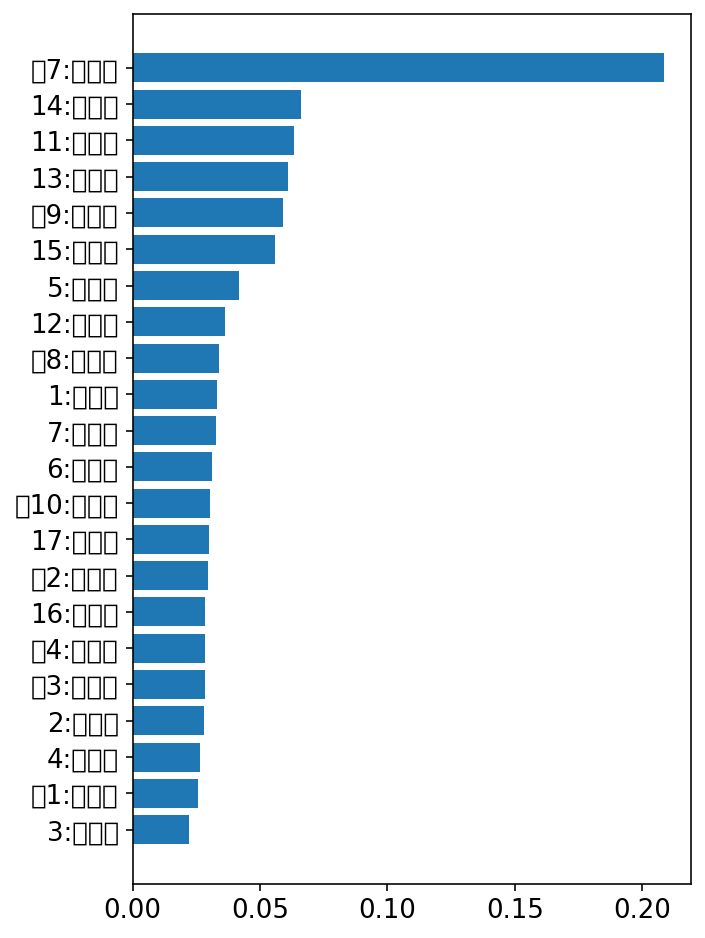

In [38]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y1_train)
y1_pred = rfr.predict(X_test)
show_reg_result(y1_test,y1_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

Max Error:  2.931
Mean Absolute Error:  0.27
Root Mean Squared Error:  0.4
R-Squared:  0.376


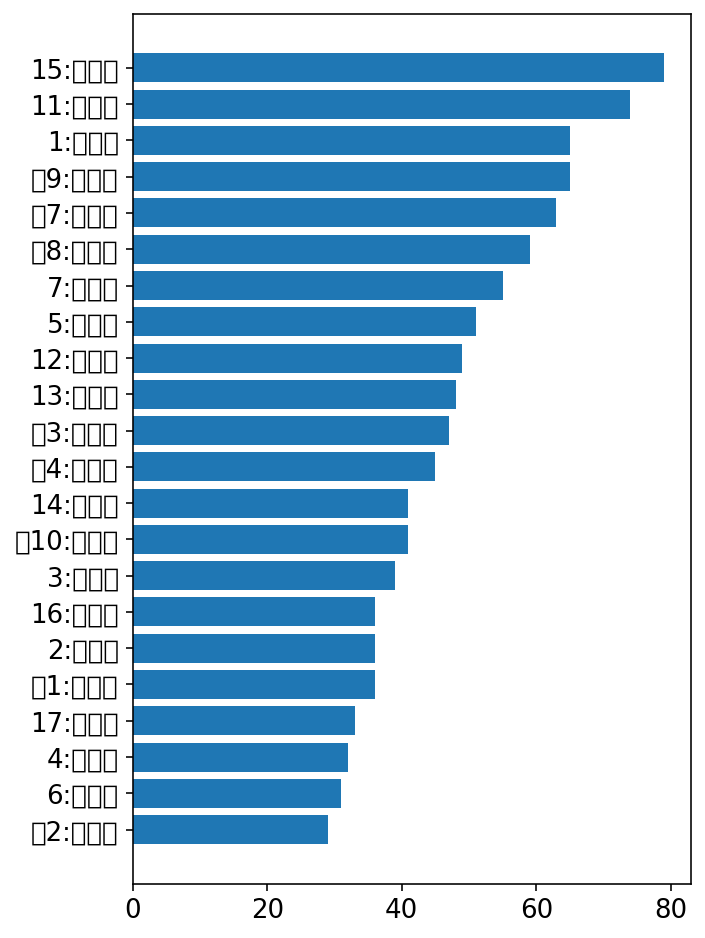

In [57]:
## 부스팅 모델 성능 확인

lgbm_r = LGBMRegressor(max_depth=19, num_leaves=32)
lgbm_r.fit(X_train, y1_train, eval_set=(X_test, y1_test), 
           early_stopping_rounds=5, verbose=False)
y1_pred = lgbm_r.predict(X_test)
show_reg_result(y1_test,y1_pred)

plot_feature_weight(X.columns, lgbm_r.feature_importances_)

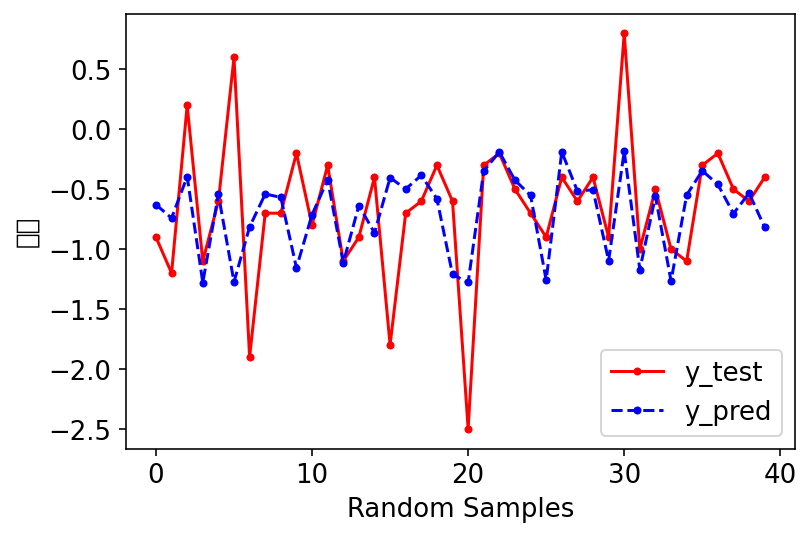

In [60]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=40):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상측")
    plt.show()

y_pred = lgbm_r.predict(X_test)
plot_reg_result(y1_test, y1_pred)

In [30]:
## 훈련 데이터와 검증 데이터 준비

features = df3.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하측", "판정.1", "좌측", "판정.2", "우측", "판정.3","상측",
       '1:에너지1',  '1:최대출력', '1:평균출력1',
       '2:에너지1',  '2:최대출력', '2:평균출력1',
       '3:에너지1',  '3:최대출력', '3:평균출력1',
       '4:에너지1',  '4:최대출력', '4:평균출력1',
       '5:에너지1',  '5:최대출력', '5:평균출력1',
       '6:에너지1',  '6:최대출력', '6:평균출력1',
       '7:에너지1',  '7:최대출력', '7:평균출력1',   

       '11:에너지1', '11:최대출력', '11:평균출력1', "11:진폭", 
       '12:에너지1', '12:최대출력', '12:평균출력1', "12:진폭", 
       '13:에너지1', '13:최대출력', '13:평균출력1', "13:진폭", 
       '14:에너지1', '14:최대출력', '14:평균출력1', "14:진폭", 
       '15:에너지1', '15:최대출력', '15:평균출력1', "15:진폭", 
       '16:에너지1', '16:최대출력', '16:평균출력1', "16:진폭", 
       '17:에너지1', '17:최대출력', '17:평균출력1', "17:진폭", 

       '우1:에너지1', '우1:최대출력', '우1:평균출력', "우1:진폭", 
       '우2:에너지1', '우2:최대출력', '우2:평균출력', "우2:진폭", 
       '우3:에너지1', '우3:최대출력', '우3:평균출력', "우3:진폭", 
       '우4:에너지1', '우4:최대출력', '우4:평균출력', "우4:진폭", 
       
       '좌7:에너지1', '좌7:최대출력', '좌7:평균출력', "좌7:진폭", 
       '좌8:에너지1', '좌8:최대출력', '좌8:평균출력', "좌8:진폭",  
       '좌9:에너지1', '좌9:최대출력', '좌9:평균출력', "좌9:진폭", 
       '좌10:에너지1', '좌10:최대출력', '좌10:평균출력', "좌10:진폭", 
           
       ])
X = df3[features]
y1 = df3["상측"]
y2 = df3["하측"]
y3 = df3["좌측"]
y4 = df3["우측"]
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.95 , random_state=9, shuffle=True)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.95 , random_state=9, shuffle=True)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.95 , random_state=9, shuffle=True)
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.95 , random_state=9, shuffle=True)

depth(상):  17 , R-squared(상측):  0.3884
depth(하):  27 , R-squared(하측):  0.4453
depth(좌):  21 , R-squared(좌측):  0.7616
depth(우):  21 , R-squared(우측):  0.6266


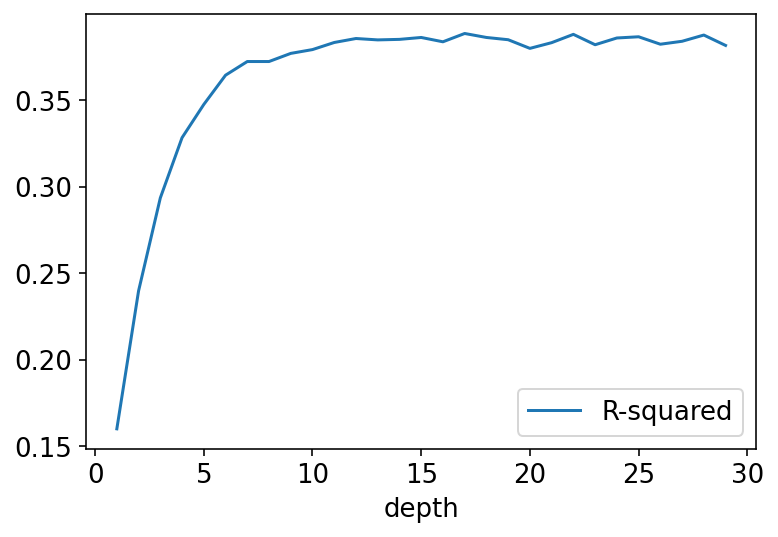

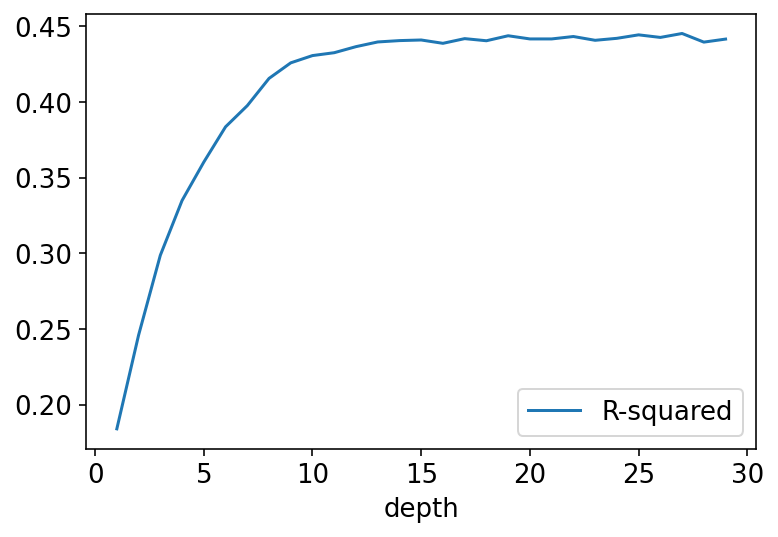

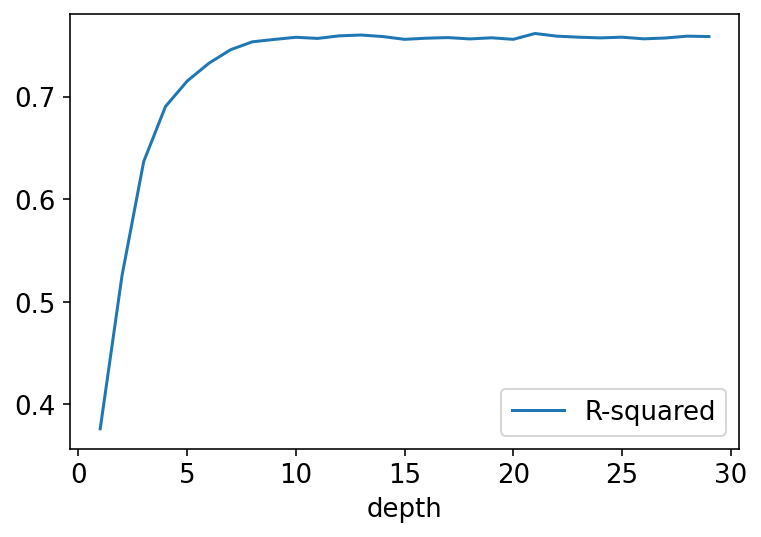

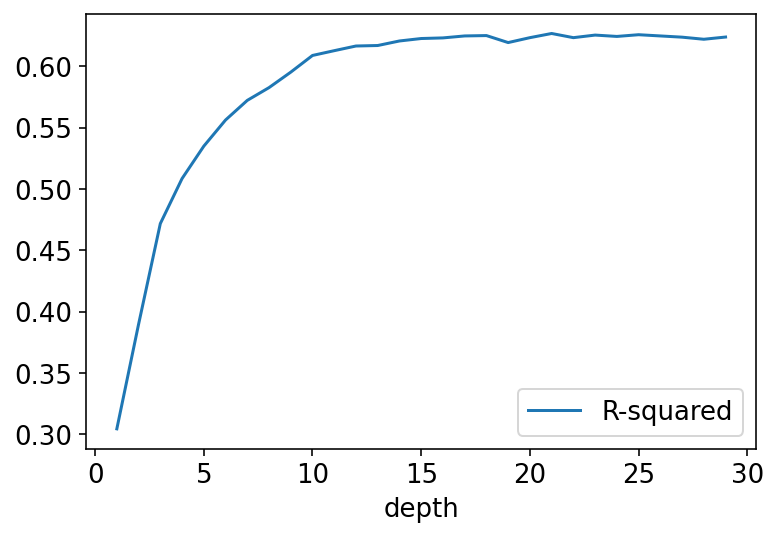

In [31]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y1_train) 
    res.append((depth, rfr.score(X_test, y1_test).round(4))) 

df1_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth(상): ',df1_res.idxmax()[0], ', R-squared(상측): ',df1_res.max()[0])
df1_res.plot()

res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y2_train) 
    res.append((depth, rfr.score(X_test, y2_test).round(4))) 

df2_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth(하): ',df2_res.idxmax()[0], ', R-squared(하측): ',df2_res.max()[0])
df2_res.plot()


res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y3_train) 
    res.append((depth, rfr.score(X_test, y3_test).round(4))) 

df3_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth(좌): ',df3_res.idxmax()[0], ', R-squared(좌측): ',df3_res.max()[0])
df3_res.plot()

res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y4_train) 
    res.append((depth, rfr.score(X_test, y4_test).round(4))) 

df4_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth(우): ',df4_res.idxmax()[0], ', R-squared(우측): ',df4_res.max()[0])
df4_res.plot()


Max Error:  2.826
Mean Absolute Error:  0.269
Root Mean Squared Error:  0.399
R-Squared:  0.381
Max Error:  4.179
Mean Absolute Error:  0.291
Root Mean Squared Error:  0.407
R-Squared:  0.443
Max Error:  2.036
Mean Absolute Error:  0.145
Root Mean Squared Error:  0.202
R-Squared:  0.76
Max Error:  1.986
Mean Absolute Error:  0.178
Root Mean Squared Error:  0.25
R-Squared:  0.623


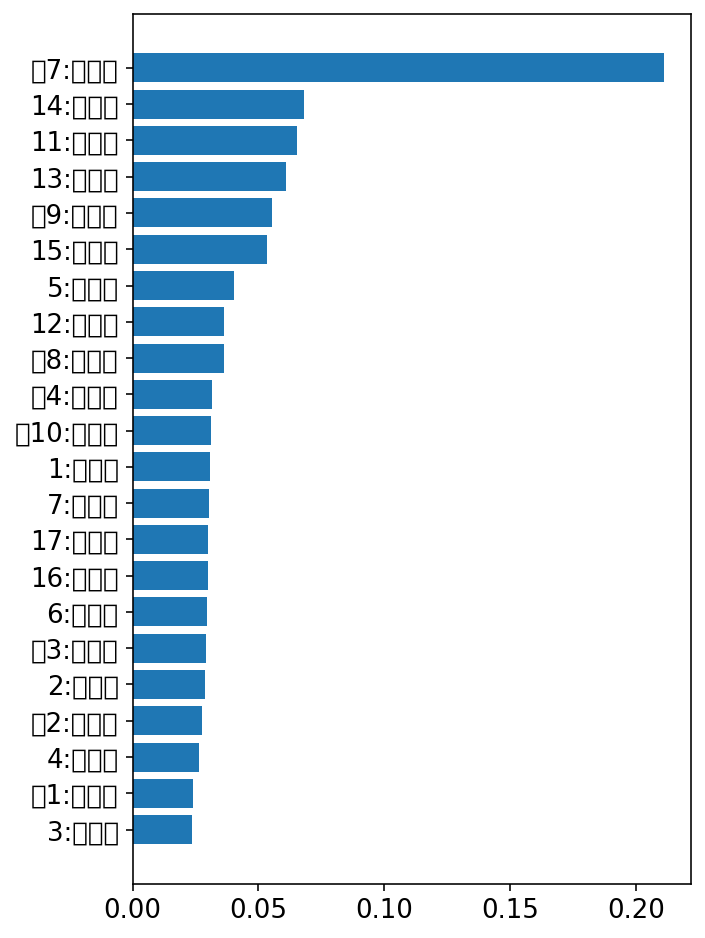

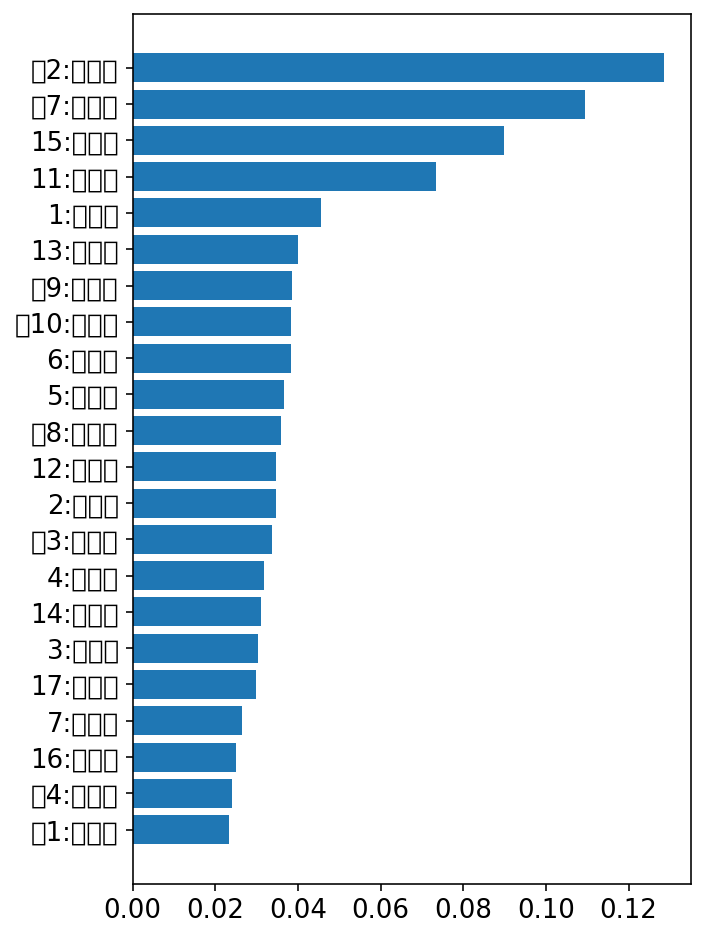

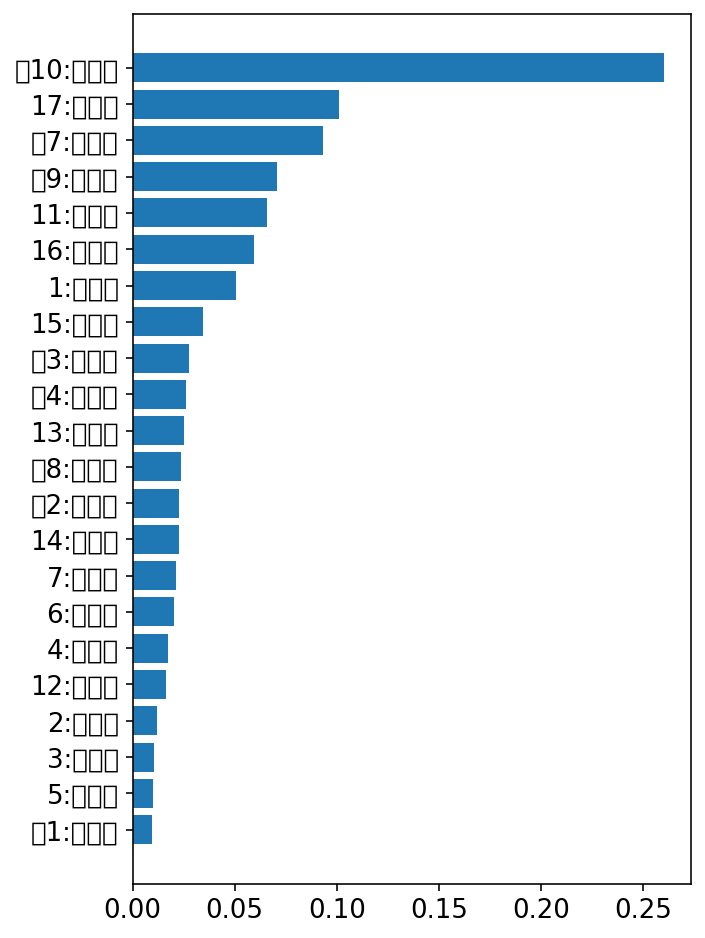

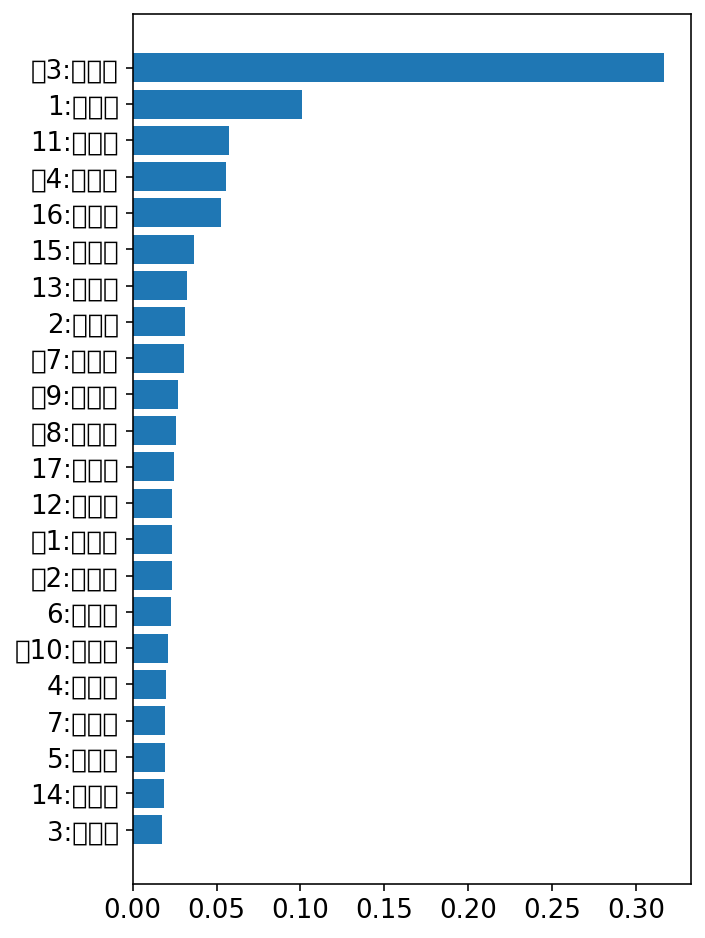

In [32]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y1_train)
y1_pred = rfr.predict(X_test)
show_reg_result(y1_test,y1_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y2_train)
y2_pred = rfr.predict(X_test)
show_reg_result(y2_test,y2_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y3_train)
y3_pred = rfr.predict(X_test)
show_reg_result(y3_test,y3_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train, y4_train)
y4_pred = rfr.predict(X_test)
show_reg_result(y4_test,y4_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

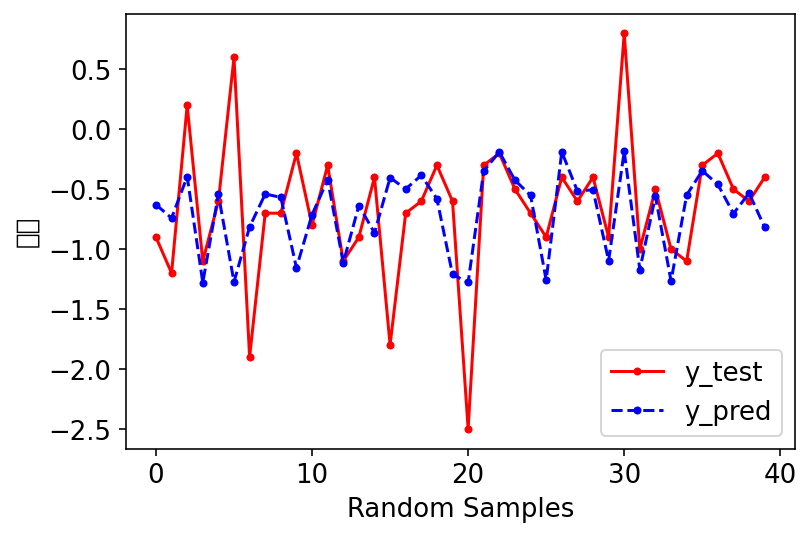

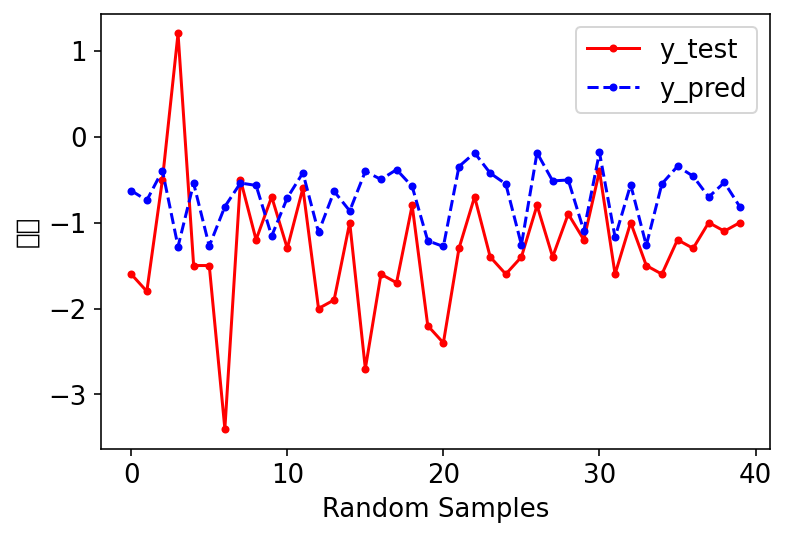

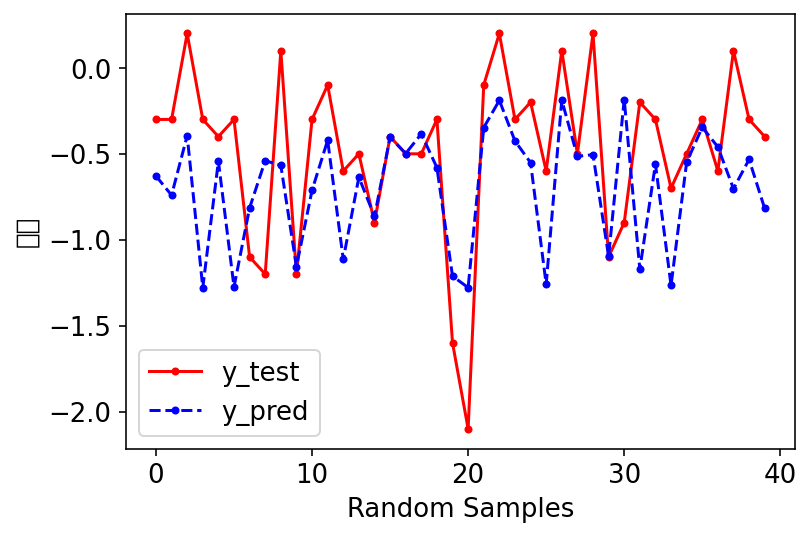

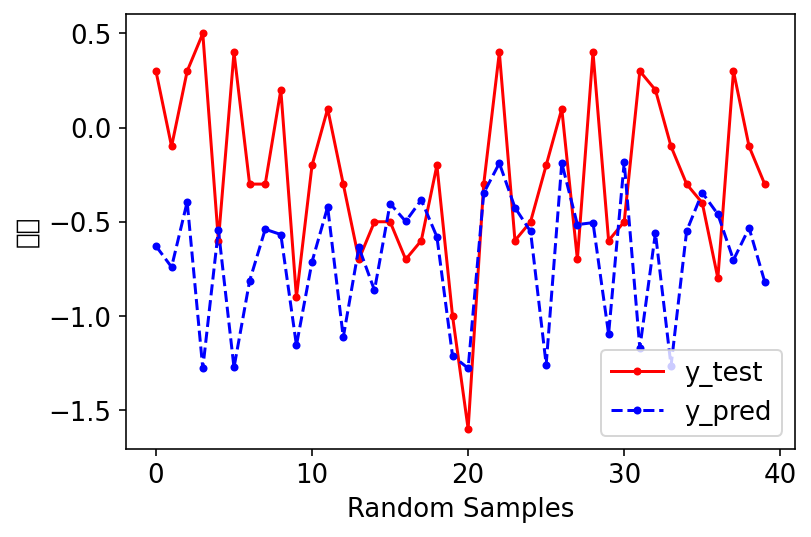

In [61]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=40):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상측")
    plt.show()

y1_pred = lgbm_r.predict(X_test)
plot_reg_result(y1_test, y1_pred)

def plot_reg_result(y_test, y_pred, N=40):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("하측")
    plt.show()

y2_pred = lgbm_r.predict(X_test)
plot_reg_result(y2_test, y2_pred)

def plot_reg_result(y_test, y_pred, N=40):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("좌측")
    plt.show()

y3_pred = lgbm_r.predict(X_test)
plot_reg_result(y3_test, y3_pred)

def plot_reg_result(y_test, y_pred, N=40):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("우측")
    plt.show()

y4_pred = lgbm_r.predict(X_test)
plot_reg_result(y4_test, y4_pred)

In [40]:
print('R-squared(상측,하측,좌측,우측)', df1_res.max()[0],df2_res.max()[0],df3_res.max()[0],df4_res.max()[0])
print('y_test(상측,하측,좌측,우측) ', y1_test[10],y2_test[10],y3_test[10],y4_test[10])
print('y_pred(상측,하측,좌측,우측) ', y1_pred[10].round(2),y2_pred[10].round(2),y3_pred[10].round(2),y4_pred[10].round(2))

R-squared(상측,하측,좌측,우측) 0.3884 0.4453 0.7616 0.6266
y_test(상측,하측,좌측,우측)  -0.3 -1.3 -0.3 -0.5
y_pred(상측,하측,좌측,우측)  -0.67 -1.62 -0.52 -0.22


In [41]:
 new=[y1_test.index, y1_test,y2_test,y2_test,y4_test , y1_pred ,y2_pred ,y3_pred ,y4_pred]

In [91]:
data_df = pd.DataFrame(new)
data_df=data_df.transpose()
data_df.columns=['번호', '상(측정)','하(측정)','좌(측정)','우(측정)','상(예측)','하(예측)','좌(예측)','우(예측)']
data_df=data_df.set_index('번호')
data_df

,상(측정),하(측정),좌(측정),우(측정),상(예측),하(예측),좌(예측),우(예측)
번호,,,,,,,,
8363.0,-0.9,-1.6,-1.6,0.3,-0.738171,-1.428245,-0.263195,-0.102956
17329.0,-1.2,-1.8,-1.8,-0.1,-0.769469,-1.211125,-0.454004,-0.111186
42465.0,0.2,-0.5,-0.5,0.3,-0.280244,-0.664000,0.088000,0.285000
16015.0,-1.1,1.2,1.2,0.5,-1.099901,-1.673333,-0.192000,0.269000
19254.0,-0.6,-1.5,-1.5,-0.6,-0.552585,-1.177465,-0.325000,-0.688134
...,...,...,...,...,...,...,...,...
1479.0,-0.5,-0.6,-0.6,-0.2,-0.537849,-0.961000,-0.379170,-0.099378
39304.0,-0.6,-1.6,-1.6,-0.6,-0.438756,-1.311013,-0.248000,-0.392368
18615.0,-0.7,-1.4,-1.4,-0.5,-0.663294,-1.402133,-0.372909,-0.218000


In [43]:
#data_df.loc[(data_df["상(측정)"] >= -3) & (data_df["상(측정)"] < 1) , '상측정(합부)'] = 1
#data_df.loc[(data_df["하(측정)"] >= -3.5) & (data_df["하(측정)"] < 3) , '하측정(합부)'] = 1
#data_df.loc[(data_df["좌(측정)"] >= -2.5) & (data_df["좌(측정)"] < 1.5) , '좌측정(합부)'] = 1
#data_df.loc[(data_df["우(측정)"] >= -2.5) & (data_df["우(측정)"] < 1.5) , '우측정(합부)'] = 1

#data_df.loc[(data_df["상(예측)"] >= -3) & (data_df["상(예측)"] < 1) , '상예측(합부)'] = 1
#data_df.loc[(data_df["하(예측)"] >= -3.5) & (data_df["하(예측)"] < 3) , '하예측(합부)'] = 1
#data_df.loc[(data_df["좌(예측)"] >= -2.5) & (data_df["좌(예측)"] < 1.5) , '좌예측(합부)'] = 1
#data_df.loc[(data_df["우(예측)"] >= -2.5) & (data_df["우(예측)"] < 1.5) , '우예측(합부)'] = 1
#data_df

,상(측정),하(측정),좌(측정),우(측정),상(예측),하(예측),좌(예측),우(예측),상측정(합부),하측정(합부),좌측정(합부),우측정(합부),상예측(합부),하예측(합부),좌예측(합부),우예측(합부)
번호,,,,,,,,,,,,,,,,
8363.0,-0.9,-1.6,-1.6,0.3,-0.738171,-1.428245,-0.263195,-0.102956,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17329.0,-1.2,-1.8,-1.8,-0.1,-0.769469,-1.211125,-0.454004,-0.111186,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
42465.0,0.2,-0.5,-0.5,0.3,-0.280244,-0.664000,0.088000,0.285000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16015.0,-1.1,1.2,1.2,0.5,-1.099901,-1.673333,-0.192000,0.269000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19254.0,-0.6,-1.5,-1.5,-0.6,-0.552585,-1.177465,-0.325000,-0.688134,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479.0,-0.5,-0.6,-0.6,-0.2,-0.537849,-0.961000,-0.379170,-0.099378,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
39304.0,-0.6,-1.6,-1.6,-0.6,-0.438756,-1.311013,-0.248000,-0.392368,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18615.0,-0.7,-1.4,-1.4,-0.5,-0.663294,-1.402133,-0.372909,-0.218000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [92]:
data_df.loc[(data_df["상(측정)"] > -2.0) & (data_df["상(측정)"] < 2.0) , '상측정(합부)'] = 1
data_df.loc[(data_df["하(측정)"] > -2.0) & (data_df["하(측정)"] < 2.0) , '하측정(합부)'] = 1
data_df.loc[(data_df["좌(측정)"] > -1.5) & (data_df["좌(측정)"] < 1.5) , '좌측정(합부)'] = 1
data_df.loc[(data_df["우(측정)"] > -1.5) & (data_df["우(측정)"] < 1.5) , '우측정(합부)'] = 1

data_df.loc[(data_df["상(예측)"] > -2.0) & (data_df["상(예측)"] < 2.0) , '상예측(합부)'] = 1
data_df.loc[(data_df["하(예측)"] > -2.0) & (data_df["하(예측)"] < 2.0) , '하예측(합부)'] = 1
data_df.loc[(data_df["좌(예측)"] > -1.5) & (data_df["좌(예측)"] < 1.5) , '좌예측(합부)'] = 1
data_df.loc[(data_df["우(예측)"] > -1.5) & (data_df["우(예측)"] < 1.5) , '우예측(합부)'] = 1
data_df

,상(측정),하(측정),좌(측정),우(측정),상(예측),하(예측),좌(예측),우(예측),상측정(합부),하측정(합부),좌측정(합부),우측정(합부),상예측(합부),하예측(합부),좌예측(합부),우예측(합부)
번호,,,,,,,,,,,,,,,,
8363.0,-0.9,-1.6,-1.6,0.3,-0.738171,-1.428245,-0.263195,-0.102956,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
17329.0,-1.2,-1.8,-1.8,-0.1,-0.769469,-1.211125,-0.454004,-0.111186,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
42465.0,0.2,-0.5,-0.5,0.3,-0.280244,-0.664000,0.088000,0.285000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16015.0,-1.1,1.2,1.2,0.5,-1.099901,-1.673333,-0.192000,0.269000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19254.0,-0.6,-1.5,-1.5,-0.6,-0.552585,-1.177465,-0.325000,-0.688134,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479.0,-0.5,-0.6,-0.6,-0.2,-0.537849,-0.961000,-0.379170,-0.099378,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
39304.0,-0.6,-1.6,-1.6,-0.6,-0.438756,-1.311013,-0.248000,-0.392368,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
18615.0,-0.7,-1.4,-1.4,-0.5,-0.663294,-1.402133,-0.372909,-0.218000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [93]:
data_df = data_df.fillna(0)
data_df

,상(측정),하(측정),좌(측정),우(측정),상(예측),하(예측),좌(예측),우(예측),상측정(합부),하측정(합부),좌측정(합부),우측정(합부),상예측(합부),하예측(합부),좌예측(합부),우예측(합부)
번호,,,,,,,,,,,,,,,,
8363.0,-0.9,-1.6,-1.6,0.3,-0.738171,-1.428245,-0.263195,-0.102956,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
17329.0,-1.2,-1.8,-1.8,-0.1,-0.769469,-1.211125,-0.454004,-0.111186,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
42465.0,0.2,-0.5,-0.5,0.3,-0.280244,-0.664000,0.088000,0.285000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16015.0,-1.1,1.2,1.2,0.5,-1.099901,-1.673333,-0.192000,0.269000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19254.0,-0.6,-1.5,-1.5,-0.6,-0.552585,-1.177465,-0.325000,-0.688134,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479.0,-0.5,-0.6,-0.6,-0.2,-0.537849,-0.961000,-0.379170,-0.099378,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
39304.0,-0.6,-1.6,-1.6,-0.6,-0.438756,-1.311013,-0.248000,-0.392368,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
18615.0,-0.7,-1.4,-1.4,-0.5,-0.663294,-1.402133,-0.372909,-0.218000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [64]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [94]:
a=data_df["상측정(합부)"].values
b=data_df["상예측(합부)"].values

show_clf_result(a,b)

[[    0   417]
 [    1 30561]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       417
         1.0       0.99      1.00      0.99     30562

    accuracy                           0.99     30979
   macro avg       0.49      0.50      0.50     30979
weighted avg       0.97      0.99      0.98     30979



In [95]:
c=data_df["하측정(합부)"].values
d=data_df["하예측(합부)"].values

show_clf_result(c,d)

[[  163  2529]
 [   51 28236]]
              precision    recall  f1-score   support

         0.0       0.76      0.06      0.11      2692
         1.0       0.92      1.00      0.96     28287

    accuracy                           0.92     30979
   macro avg       0.84      0.53      0.53     30979
weighted avg       0.90      0.92      0.88     30979



In [96]:
e=data_df["좌측정(합부)"].values
f=data_df["좌예측(합부)"].values

show_clf_result(e,f)

[[  294  8795]
 [   59 21831]]
              precision    recall  f1-score   support

         0.0       0.83      0.03      0.06      9089
         1.0       0.71      1.00      0.83     21890

    accuracy                           0.71     30979
   macro avg       0.77      0.51      0.45     30979
weighted avg       0.75      0.71      0.61     30979



In [97]:
g=data_df["우측정(합부)"].values
h=data_df["우예측(합부)"].values

show_clf_result(g,h)

[[   24   211]
 [   18 30726]]
              precision    recall  f1-score   support

         0.0       0.57      0.10      0.17       235
         1.0       0.99      1.00      1.00     30744

    accuracy                           0.99     30979
   macro avg       0.78      0.55      0.58     30979
weighted avg       0.99      0.99      0.99     30979

